**Loading the required libraries**

In [0]:
from sklearn import datasets
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

**Loading our dataset and splitting our dummy dataset**

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4]


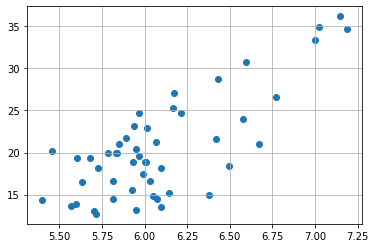

[5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927]
[19.7 20.5 25.  23.4 18.9 35.4 24.7 31.6 23.3 19.6]


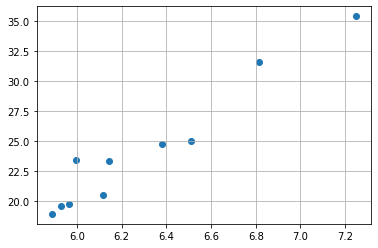

In [137]:
housing_X, housing_y = datasets.load_boston(return_X_y=True)
#Choosing RM as feature for toy dataset
housing_X = housing_X[:, np.newaxis, 5] 
#Arranging train data
x_train = np.array(housing_X[:50])
y_train = np.array(housing_y[:50])
x_train = np.squeeze(x_train)
#Arranging test data
x_test = np.array(housing_X[50:60])
y_test = np.array(housing_y[50:60])
x_test = np.squeeze(x_test)
#Printing and scattering train data
print(x_train)
print(y_train)
plt.grid()
plt.scatter(x_train,y_train)
plt.show()
#Printing and scattering test data
print(x_test)
print(y_test)
plt.grid()
plt.scatter(x_test,y_test)
plt.show()

**Batch gradient descent function**

In [0]:
def bgd(x,y,m_new,c_new,learning_rate,epoch):
  N=float(len(y))
  cost1 = np.array(1, dtype=float, order='C')
  for i in range(epoch):
    y_new=(m_new*x) + c_new
    cost=sum([t**2 for t in(y-y_new)])/N
    cost1 = np.append(cost1, cost)
    c_grad=-(2/N)*sum(y-y_new)
    m_grad=-(2/N)*sum(x*(y-y_new))
    m_new=m_new-(learning_rate*m_grad)
    c_new=c_new-(learning_rate*c_grad)  
  plt.xlabel('Epoch')
  plt.ylabel('Cost')
  plt.title('Converging point')
  plt.plot(range(epoch+1), cost1)
  plt.show()
  line = m_new*x + c_new
  plt.xlabel('Train values of X')
  plt.ylabel('Train values of Y')
  plt.title('Adjusting m and c for a batch of 50')
  plt.grid()
  plt.scatter(x,y)
  plt.plot(x,line,"r-")
  plt.show()
  return m_new,c_new

**Hypothesis function**

In [0]:
def hypothesis(x,m,c):
    y_pred=[]
    #Predicting Y against X for given slope and gradient
    for i in range(len(x)):
        y=np.asscalar(np.dot(m,x[i])+c)
        y_pred.append(y)
    return np.array(y_pred)

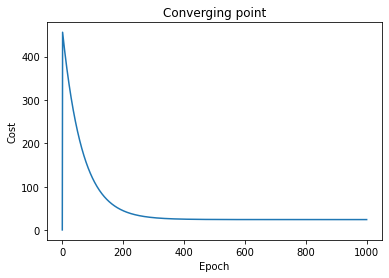

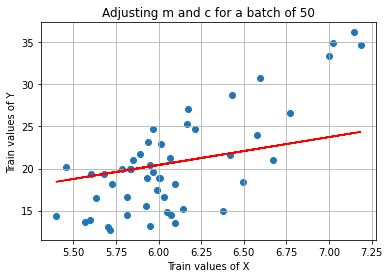

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


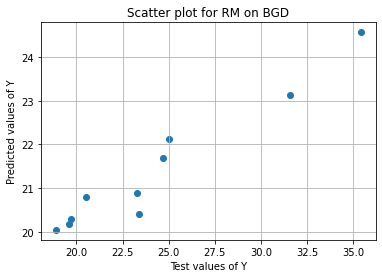

Mean Squared Error : 22.338294592206537
CPU times: user 776 ms, sys: 230 ms, total: 1.01 s
Wall time: 739 ms


In [144]:
%%time
m,c = bgd(x_train,y_train,0,0,0.0001,1000)
y_pred = hypothesis(x_test,m,c)
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Test values of Y')
plt.ylabel('Predicted values of Y')
plt.title('Scatter plot for RM on BGD')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))